In [4]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [5]:
# Import useful libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
#pio.renderers.default = "png" # Comment / delete this line for interactive graphs

#import warnings
#warnings.filterwarnings("ignore")

In [6]:
# Import princing data
pricing_data = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv")

In [7]:
print(f"Number of rows : {pricing_data.shape[0]}")
print(f"Number of columns : {pricing_data.shape[1]}")
print()

print("Display of data: ")
display(pricing_data.head(10))
print()

print("Basics statistics: ")
display(pricing_data.describe(include='all'))
print()
pd.options.display.max_rows = 999
print("Percentage of missing values: ")
display((100 * pricing_data.isnull().sum() /pricing_data.shape[0]).sort_values())

Number of rows : 4843
Number of columns : 15

Display of data: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131
6,6,Citroën,205219,145,diesel,grey,convertible,True,True,False,False,True,True,True,111
7,7,Citroën,115560,105,petrol,white,convertible,True,True,False,False,False,True,True,78
8,8,Peugeot,123886,125,petrol,black,convertible,True,False,False,False,False,True,True,79
9,9,Citroën,139541,135,diesel,white,convertible,False,False,False,False,True,False,True,132



Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

There are no missing values in this dataset

In [8]:
# Create box plots for all numeric columns in the dataset
for column in pricing_data.select_dtypes(include=['number']).columns:
    fig = px.box(pricing_data, y=column, title=f'Box Plot of {column}')
    fig.update_xaxes(title_text=column)
    fig.show()

There seems to be an abnormal value in the 'mileage' column, we will remove it. The other outliers seem ok.

In [9]:
# Delete 'mileage' outliers
pricing_data = pricing_data[pricing_data['mileage'] <= 500000]

# Check new shape of dataset
pricing_data.shape

(4842, 15)

## EDA - visualizations

**Univariate analysis for numeric variables**

In [10]:

# Create a histogram for 'mileage'
fig_mileage = px.histogram(pricing_data, x="mileage", title="Distribution of Mileage")
fig_mileage.show()

# Create a histogram for 'engine power'
fig_engine_power = px.histogram(pricing_data, x="engine_power", title="Distribution of Engine Power")
fig_engine_power.show()

# Create a histogram for 'rental price per day'
fig_rental_price = px.histogram(pricing_data, x="rental_price_per_day", title="Distribution of Rental Price per Day")
fig_rental_price.show()

**Univariate analysis for categorical variables**

In [11]:

# Bar plot for car brand (model_key)
fig_brand = px.bar(pricing_data, x="model_key", title="Frequency of Car Brands")
fig_brand.show()

# Bar plot for fuel type
fig_fuel = px.bar(pricing_data, x="fuel", title="Frequency of Fuel Types")
fig_fuel.show()

# Bar plot for paint color
fig_color = px.bar(pricing_data, x="paint_color", title="Frequency of Paint Colors")
fig_color.show()

# Bar plot for car type
fig_type = px.bar(pricing_data, x="car_type", title="Frequency of Car Types")
fig_type.show()

# Bar plot for private parking availability
fig_parking = px.bar(pricing_data, x="private_parking_available", title="Private Parking Availability")
fig_parking.show()

The most frequent brand cars are : Citroën, Renault and BWM
The most frequent fuel is diesel.
The most frequent paint colors are neutral colors : black, grey and blue.
The most frequent car types are : estate, sedan and suv.

**Bivariate analysis**

In [12]:
# Numeric features
  # List of numeric columns (excluding 'rental_price_per_day')
numeric_columns = ['mileage', 'engine_power']

  # Create scatter plots for each numeric column vs. rental_price_per_day
for column in numeric_columns:
    fig = px.scatter(pricing_data, x=column, y='rental_price_per_day', title=f'{column} vs. Rental Price')
    fig.show()

We can say that the higher the mileage, the lower rental price per day is.

Regarding engine power, when the power increases, the rental price per day increases as well.

In [19]:
# Categorical features
  # List of categorical columns
categorical_columns = ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

  # Create box plots for each categorical column vs. rental_price_per_day
for column in categorical_columns:
    fig = px.box(pricing_data, x=column, y='rental_price_per_day', title=f'{column} vs. Rental Price')
    fig.show()

<ipython-input-20-c6683db6f6a1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



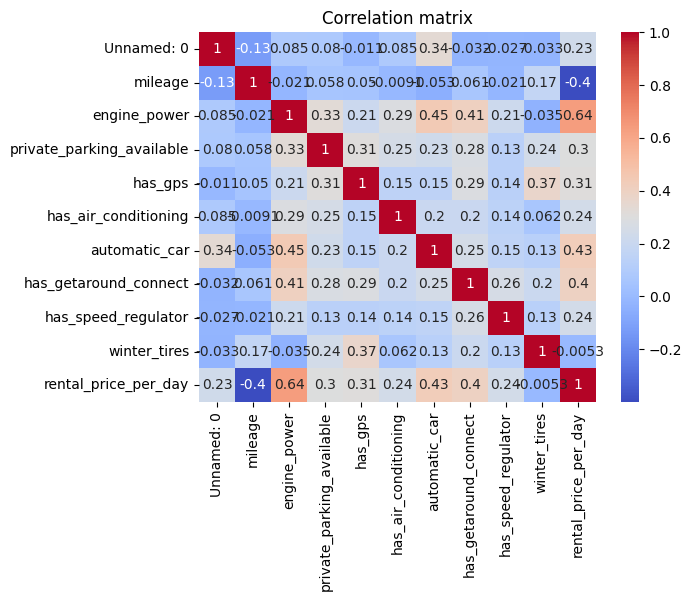

In [20]:
corr_ = pricing_data.corr(method = 'spearman')

sns.heatmap(corr_ , annot = True , cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

Here are some interpretations :

- the most luxurious brands are more expensive
- hybrid is the most expensive fuel type
- green car are cheaper
- sedan and suv cars are more expensive
- when a parking lot is available, the rental price per day is higher
- cars with GPS option are lightly more expensive
- cars with air conditionning option are lightly more expensive
- automatic cars are more expensive
- Getaround Connect option doesn't seem to have an impact on the rental price per day
- cars with speed regulator option are more expensive
- cars with winter tires are more expensive.

In general, cars with more or better options are more expensive, it totally makes sens.

**Which share of our owner’s revenue would potentially be affected by the feature?**

Unfortunately there is no way to connect delay_data dataset and pricing_data dataset as they share no identical informations. So we won't be able to answer this question.

According to the correlation matrix above, the explanatory variables do not seem to be correlated with each other and can therefore all be used when training the model.
At the same time, as expected, certain variables are more linked to the rental price than others, particularly engine power and mileage

## Machine Learning

In addition to the above question, the Data Science team is working on pricing optimization. They have gathered some data to suggest optimum prices for car owners using Machine Learning.

Let's try different models. We will start with a Linear regression, then try with a random forest and finally with a greadiant boosting model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [22]:
#Preprocessing of the dataset

# Separating target Y from features X.
target_name = 'rental_price_per_day'

print("Separating labels from features...")
Y = pricing_data.loc[:,target_name]
X = pricing_data.drop(target_name, axis = 1)
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

   Unnamed: 0 model_key  mileage  engine_power    fuel paint_color  \
0           0   Citroën   140411           100  diesel       black   
1           1   Citroën    13929           317  petrol        grey   
2           2   Citroën   183297           120  diesel       white   
3           3   Citroën   128035           135  diesel         red   
4           4   Citroën    97097           160  diesel      silver   

      car_type  private_parking_available  has_gps  has_air_conditioning  \
0  convertible                       True     True                 False   
1  convertible                       True     True                 False   
2  convertible                      False    False                 False   
3  convertible                       True     True                 False   
4  convertible                       True     True                 F

In [23]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Unnamed: 0', 'mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [24]:
# Dividing dataset in Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [25]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [26]:
# Preprocessings on the train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on the test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)

print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
      Unnamed: 0   model_key  mileage  engine_power    fuel paint_color  \
432          432     Citroën   234365           135  diesel       black   
1983        1983  Volkswagen    57344            70  diesel        grey   
289          289     Peugeot   181297           105  diesel       brown   
2584        2584     Peugeot   183011           100  diesel       black   
4826        4826      Yamaha    28573            70  diesel         red   

       car_type  private_parking_available  has_gps  has_air_conditioning  \
432      estate                       True     True                 False   
1983  hatchback                      False     True                 False   
289      estate                      False     True                 False   
2584      sedan                      False     True                 False   
4826        van                       True     True                 False   

      automatic_car  has_getaround_connect  

# Linear Regression

In [27]:
# Train model
print("Train model...")
Linear = LinearRegression()
Linear.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [29]:
# Predictions sur le training set
print("Predictions on training set...")
Y_train_pred = Linear.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions sur le test set
print("Predictions on test set...")
Y_test_pred = Linear.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[ 95.71474925 125.32941913 104.52399788 ... 197.07393767 114.52010667
 139.63723981]

Predictions on test set...
...Done.
[ 73.95699848 143.96699893 129.44996853 202.99858542 108.26694707
 139.78308185 114.78883798 133.95810076  92.38050979 127.26240885
 122.7969011  117.68755225 137.66496127 110.86681267 123.57633976
 106.43862739 110.28801153  55.94982175  89.47726346 134.63981937
 104.11173188 164.42744525 101.14267098 112.52573331 104.4918426
 141.53459383 134.60917384 100.03116815  77.70443938 117.42645362
  85.72185204  44.47082719 108.49019003 113.32895543 131.67824865
 121.22743617 146.31632884  97.22262873 139.04989513 131.8744882
 113.92377762 131.19191958 132.87177799  71.52100303 147.92518909
 105.11240246 131.66583335 165.73657113 114.42021844  99.67118913
 144.63036896 123.69506962  98.65294893 128.40195418 120.58772154
  88.45051839 108.96689573 139.38889276 151.06762186 134.43807364
 134.13534462  94.28173246 141.37485858  99.2676

In [30]:
#R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7178105540426264
R2 score on test set :  0.660764661348631


In [31]:
# Calculate Mean Absolute Error (MAE)
print("Mean Absolute Error : ", mean_absolute_error(Y_test, Y_test_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error : ", mean_squared_error(Y_test, Y_test_pred))

Mean Absolute Error :  13.070669997595369
Mean Squared Error :  390.0254891971166


In [32]:
#Calculate the coefficients for each feature
Linear.coef_

array([  1.61203329, -13.41704116,  14.09529819, -15.87605651,
        -6.97429232, -10.78925921, -13.65148017,  -3.01647564,
       -50.67754913, -29.89593063,  24.17704887,  -9.20546863,
       -16.18060948,  -8.88956436,  16.2878343 ,   5.08425791,
       -22.29051608,   3.34610208, -18.57616028,   8.94894219,
       -27.02120463, -10.02489023, 108.66468402,  -3.54469164,
        17.51741521,   4.6966304 ,  16.63232673,  13.71425086,
         5.1250258 ,  22.41963058,  45.26387017, -50.79255766,
       -20.42449509,  25.95318257,   2.69979357,   2.96266568,
         0.32784567,   4.05875927, -19.48903782,   2.32807446,
        -2.85494738,   3.81992646,  -0.72360011,   6.87052019,
        10.6188369 ,  11.71868716,  -1.75850972,  -2.38968801,
         2.68481461,  -3.05025838,   7.15818735, -24.9820699 ,
        -0.83290361,   0.83290361,  -6.07038951,   6.07038951,
        -0.46161308,   0.46161308,  -2.0845093 ,   2.0845093 ,
        -2.36472794,   2.36472794,  -2.34501365,   2.34

# Regularized linear model using Ridge and Lasso

In [33]:
# Using 10-fold cross-validation to evaluate R2 score with Ridge model
print("10-fold cross-validation...")
ridge_regressor = Ridge()
scores = cross_val_score(ridge_regressor, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.707729065121276
The standard deviation is :  0.05027015561492727


In [34]:
# GridSearch
print("Grid search...")
ridge_regressor = Ridge()

# Setting the parameters
params = {
    'alpha': [0.0, 0.5, 1.0, 1.5, 1.7, 1.75, 1.8, 1.9, 2.0, 5.0]
}
gridsearch = GridSearchCV(ridge_regressor, param_grid = params, cv = 10)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.5}
Best R2 score :  0.7079891565343099


In [35]:
# Predictions sur le training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions sur le test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[ 95.73741429 125.44119488 104.54644215 ... 196.47612505 114.58549981
 139.54640236]

Predictions on test set...
...Done.
[ 74.27441738 143.94629593 129.43602147 201.71048267 108.142588
 139.81537733 114.6316938  134.02905116  92.36094356 127.34874037
 122.75813073 117.59495442 137.73218788 110.91149573 123.84589031
 106.6004701  110.20727861  55.78526326  89.55434051 134.62959999
 104.00605448 164.58900579 101.09475932 112.6368045  104.56352015
 141.42562882 134.6918227  100.11608409  77.77739355 117.56034272
  85.79700354  44.34548553 108.48873376 113.15876446 131.72848471
 121.24873294 146.32160048  97.21804817 139.07414666 131.91772199
 113.96458406 131.13758538 132.74712793  71.55096531 148.25289449
 105.04136953 131.77438323 165.45317133 114.54884391  99.59599142
 144.5038249  123.57836425  98.70704377 128.42428455 120.59499654
  88.44305103 108.97785511 139.44001954 151.07677785 134.55460103
 134.16704072  94.30919209 141.37229948  99.2747

In [38]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.7172237659501284
R2 score on test set :  0.6864193203323601


In [39]:
# Calculate Mean Absolute Error (MAE)
print("Mean Absolute Error : ", mean_absolute_error(Y_test, Y_test_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error : ", mean_squared_error(Y_test, Y_test_pred))

Mean Absolute Error :  12.941590955872583
Mean Squared Error :  360.5298270998455


The R2 Score is slightly higher on the test set with a regularized Ridge Model, let's try with a Lasso model

In [40]:
# Using 10-fold cross-validation to evaluate R2 score with Lasso model
print("10-fold cross-validation...")
lasso_regressor = Lasso()
scores = cross_val_score(lasso_regressor, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

10-fold cross-validation...
The cross-validated R2-score is :  0.6402835820731866
The standard deviation is :  0.05028747590951767


In [43]:
# GridSearch
print("Grid search...")
lasso_regressor = Lasso()

#Parameters
params = {
    'alpha': [0.0, 0.5, 1.0, 1.5, 1.7, 1.75, 1.8, 1.9, 2.0, 5.0]
}
gridsearch = GridSearchCV(lasso_regressor, param_grid = params, cv = 10)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 557019.8884838568, tolerance: 395.3335335437588

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 549324.8701365234, tolerance: 385.0930399999996

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686

...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.7076332704016352


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 611523.6883168236, tolerance: 433.413578827782



In [44]:
# Predictions sur le training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions sur le test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[ 95.7147866  125.32948284 104.52391307 ... 197.07380259 114.52008109
 139.63719924]

Predictions on test set...
...Done.
[ 73.95704069 143.96702196 129.4499432  202.99856283 108.26698302
 139.78310947 114.78877305 133.95814493  92.38042417 127.2623928
 122.79692763 117.68793294 137.66497211 110.8667425  123.57630554
 106.43863262 110.28795095  55.94974886  89.47719243 134.63982951
 104.11165818 164.42761234 101.14263875 112.52576542 104.49183473
 141.53458856 134.60919196 100.03117269  77.70435995 117.42652326
  85.72177593  44.47073814 108.49013499 113.32901841 131.67830864
 121.22744548 146.31634114  97.22264401 139.04986915 131.87446113
 113.92372493 131.19185615 132.87177936  71.52089846 147.92502009
 105.11246447 131.6658518  165.73652592 114.42021431  99.67117851
 144.63043557 123.69501799  98.65294985 128.40204492 120.58769083
  88.45045236 108.96687938 139.38896008 151.06762362 134.43808907
 134.13535671  94.28168048 141.37484712  99.267

In [45]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.7178105540805815
R2 score on test set :  0.6613079247991414


In [46]:
# Calculate Mean Absolute Error (MAE)
print("Mean Absolute Error : ", mean_absolute_error(Y_test, Y_test_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error : ", mean_squared_error(Y_test, Y_test_pred))

Mean Absolute Error :  13.065242260043629
Mean Squared Error :  389.4008886060032


The R2 Score is almost the same as without regularization. If we had to choose we would go with a Ridge Linear model. Let's try the next model

# Random Forest

In [50]:
# Perform grid search
print("Grid search...")
RandomForest = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60]
}
gridsearch = GridSearchCV(RandomForest, param_grid = params, cv = 3)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 40}
Best validation accuracy :  0.7308710284953817


In [54]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions sur le test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[111.47285689 111.24904735 109.29231681 ... 227.24054494 117.26495386
 131.36224676]

Predictions on test set...
...Done.
[ 67.85970189 130.68379499 126.13510891 209.46176588 115.47745482
 144.60506353 110.98522206 124.92204513  93.27401716 129.81678441
 121.89998698 114.82253652 137.82340515 114.11977182 119.70706883
 102.66776233 111.72910357  52.79141364  84.18585059 134.32584977
 103.05491185 177.67490059  82.94782336 113.55463879 113.6247623
 138.35538095 133.37177025 104.75754181  83.92376777 114.41548533
 101.25367388  56.0519537  104.28811358 107.9875273  140.22954969
 125.7604451  145.66666109  96.31449908 136.1053423  126.79629495
 118.47441731 135.30955587 131.38866779  71.24860388 153.93337833
  98.38615252 136.13632348 178.19930105 113.6088612   94.34368493
 134.89136371 121.52955699  94.57988402 111.63212657 102.14138494
  94.9874318  112.0648616  138.41279186 141.71192783 137.1216038
 135.26313074  95.31534153 121.75215921 104.7575

In [55]:
# Print scores
print("R2 on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 on test set : ", r2_score(Y_test, Y_test_pred))

R2 on training set :  0.8571795306421274
R2 on test set :  0.731898283607592


In [56]:
# Calculate Mean Absolute Error (MAE)
print("Mean Absolute Error : ", mean_absolute_error(Y_test, Y_test_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error : ", mean_squared_error(Y_test, Y_test_pred))

Mean Absolute Error :  11.389284724396887
Mean Squared Error :  308.2417754772835


The R2 score is higher for both training and test set. Let's keep this model for our project !